In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engineering import (price_new_features)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import datetime as dt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
import pickle

In [2]:
# importing data
data = pd.read_csv('data/curr_price_financial_fill.csv')

In [6]:
# getting data for one SecurityCode
df = data.query('SecuritiesCode == 1332')
#df = df.drop([['rev_ttm_growth', 'win_ttm_growth', 'rev_ttm', 'Profit_ttm']], axis=1)
# setting date as index
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
# dropping na values
df = df.dropna(axis=0)
# splitting train and test
train = df[:-10]
test = df[-10:]

<AxesSubplot:xlabel='Date', ylabel='margin'>

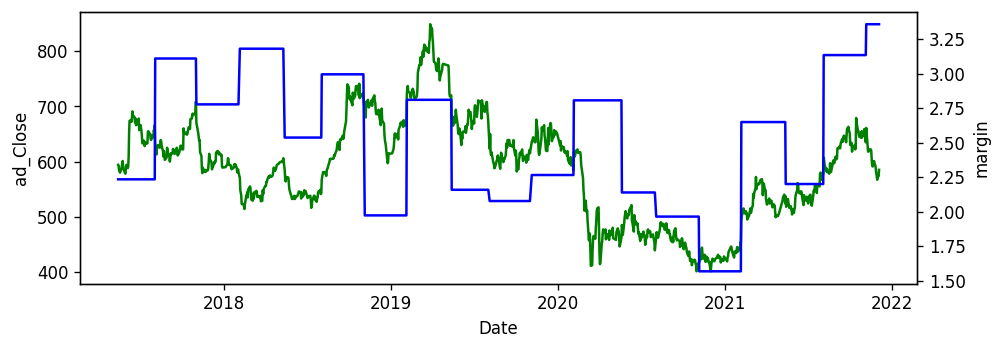

In [7]:
import matplotlib.pyplot as plt
sns.lineplot(df.index, df.ad_Close, color="g")
ax2 = plt.twinx()
sns.lineplot(df.index, df.margin, color="b", ax=ax2)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', varia

<AxesSubplot:xlabel='Date', ylabel='seasonal'>

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/corneliusbohle/Desktop/tokyo/tokyo-stock-exchange/.capstone/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', varia

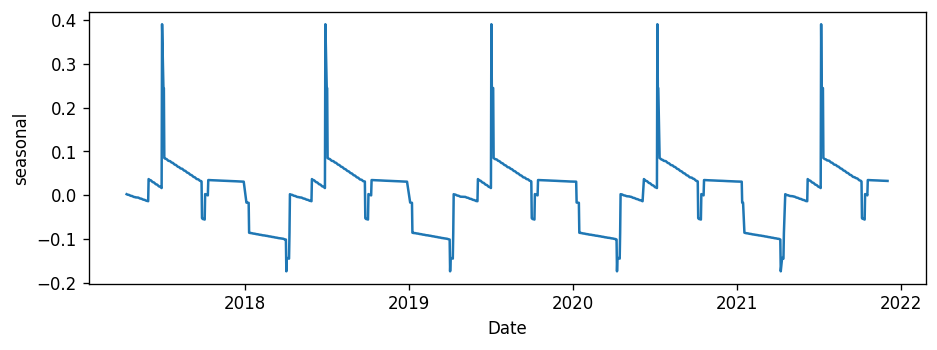

In [8]:
margin_decompose = seasonal_decompose(df.margin, period=245)
margin_trend = margin_decompose.trend.dropna(axis=0)
margin_detrend = df.margin[:len(margin_trend.dropna(axis=0))] - margin_trend.dropna(axis=0)
margin_season = margin_decompose.seasonal.dropna(axis=0)
margin_error = margin_decompose.resid.dropna(axis=0)
sns.lineplot(df.index, margin_season)

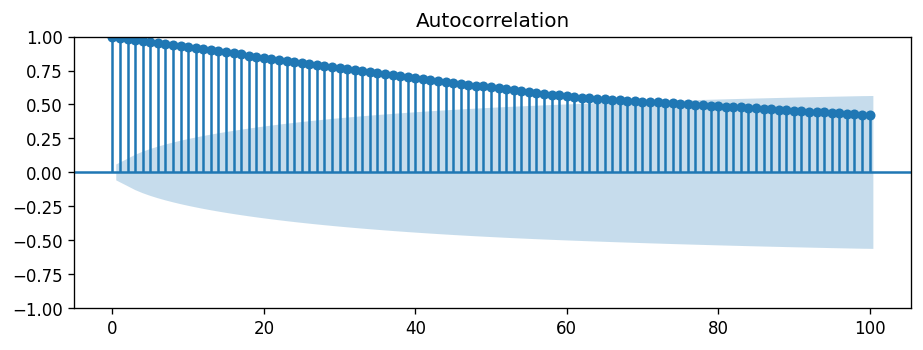

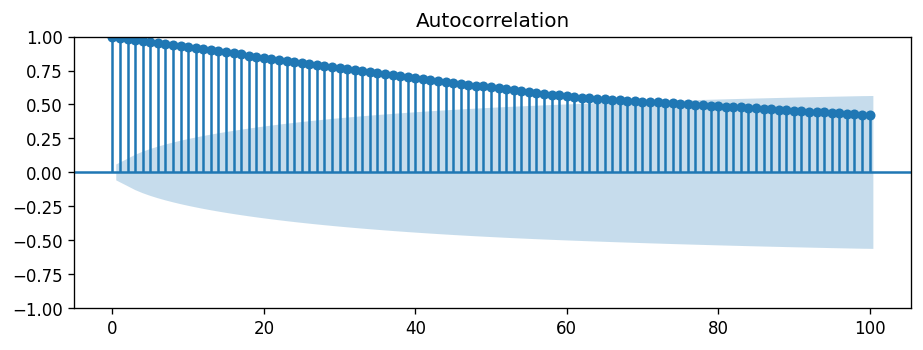

In [13]:
plot_acf(train.margin, lags=100)

In [14]:
# implementing model
margin_model = ARIMA(endog = train.margin, order=(1,1,60), seasonal_order=(3, 1, 3, 245))
# fitting model
margin_model_fit = margin_model.fit()
# print summary
print(margin_model_fit.summary())

In [3]:
# forecasting for the test data
margin_preds = margin_model_fit.forecast(len(test.margin))

NameError: name 'margin_model_fit' is not defined

In [7]:
# creating two lists of train price and predictions and real prices
margin_prediction = df.margin.to_list()[:-len(test.margin)] + margin_preds.to_list()
margin_real = df.margin.to_list()

<AxesSubplot:xlabel='Date', ylabel='margin'>

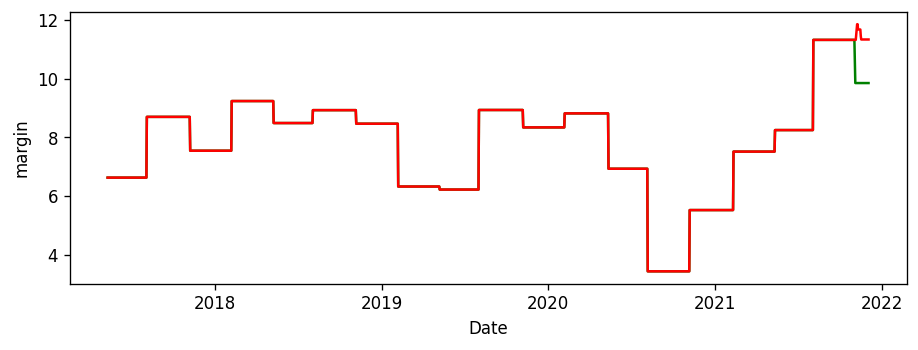

In [8]:
# plotting real prices and predictions
import matplotlib.pyplot as plt
#set(xlim=("2021-11-03","2021-12-03"))
sns.lineplot(df.index, df.margin, color="green")


sns.lineplot(df.index, margin_prediction, color="red")

In [10]:
# calculating rmse and rmse/avg price
margin_score = mean_squared_error(test.margin.to_list(), margin_preds, squared=False)
print(margin_score)
print(margin_score / df.margin.mean())

0.985184403715096
0.1262769230026376


In [11]:
margin_preds.to_csv('data/margin_preds.csv')

In [2]:
filename = 'margin_7203_model.sav'
pickle.dump(margin_model_fit, open(filename, 'wb'))

NameError: name 'margin_model_fit' is not defined